In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calplot
import numpy as np
import impute as imp

## Verifying the dataset

In [2]:
tmx=pd.read_csv('../../01_weather_data/01_raw_data/Temixco_2018_N006c.csv',index_col=0,parse_dates=True)


In [3]:
tmx

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,NaN,NaN,18.70,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91
...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03


Text(0.5, 1.0, 'Daily solar Energy')

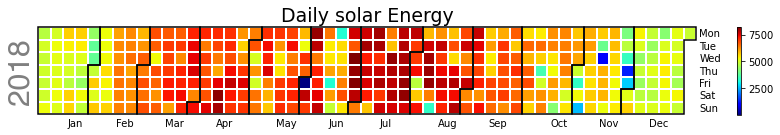

In [4]:
tmx['Eg']=tmx['Ig']/6
tmx_d=tmx.resample('D').sum()
calplot.calplot(tmx_d['Eg'],cmap='jet',how='sum',edgecolor='black',linewidth=1.5)
plt.title('Daily solar Energy',fontsize=19)

## Pasting 02-June to 01-June

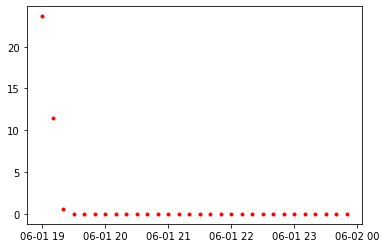

In [5]:
plt.plot(tmx.Ig.loc['2018-06-01'],'r.')

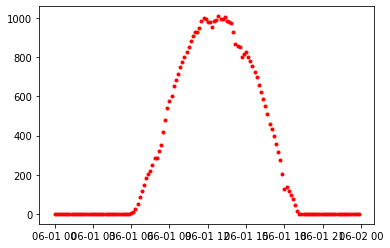

In [6]:
tmx_2=tmx.copy()
tmx['2018-06-01 00:00':'2018-06-02 00:00']=tmx_2['2018-06-02 00:00':'2018-06-03 00:00']
plt.plot(tmx.Ig.loc['2018-06-01'],'r.')
# Sustituir todas las variables

Text(0.5, 1.0, 'Daily solar Energy')

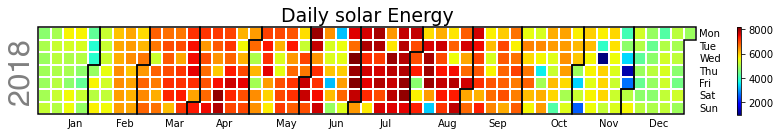

In [7]:
tmx['Eg']=tmx['Ig']/6
tmx_d=tmx.resample('D').sum()
tmx.fillna(0,inplace=True)
calplot.calplot(tmx_d['Eg'],cmap='jet',how='sum',edgecolor='black',linewidth=1.5)
plt.title('Daily solar Energy',fontsize=19)

In [8]:
def maxmin_season(dailydf,fecha1,fecha2):
    df=dailydf.loc[fecha1:fecha2]
    dfmax=df.Eg.idxmax()
    dfmin=df.Eg.idxmin()
    print('dia_maximo:',dfmax)
    print('dia_minimo:',dfmin)

### Season 1 January:March

In [9]:
season1='2018-01-01'
season1e='2018-03-31'
imp.maxmin_season(tmx_d,season1,season1e)

dia_maximo: 2018-03-29 00:00:00
dia_minimo: 2018-01-30 00:00:00


### Season 2 Apr:Jun

In [10]:
season2='2018-04-01'
season2e='2018-06-30'
imp.maxmin_season(tmx_d,season2,season2e)

dia_maximo: 2018-06-27 00:00:00
dia_minimo: 2018-06-15 00:00:00


### Season 3 Jul:Sept

In [11]:
season1='2018-07-01'
season1e='2018-09-30'
imp.maxmin_season(tmx_d,season1,season1e)

dia_maximo: 2018-07-28 00:00:00
dia_minimo: 2018-08-12 00:00:00


### Season 4 Oct:Dec

In [12]:
season1='2018-10-01'
season1e='2018-12-31'
imp.maxmin_season(tmx_d,season1,season1e)

dia_maximo: 2018-10-05 00:00:00
dia_minimo: 2018-11-14 00:00:00


## Exporting 2018 complete year 

In [13]:
tmx.to_csv('../../01_weather_data/03_imputing_process/01_test_data/base_temixco.csv')

# Deleting the min and max radiation days of each season 

In [14]:
days=['2018-03-29','2018-01-30','2018-06-27','2018-06-15','2018-07-28','2018-08-12','2018-10-05','2018-11-14']
print('Deleted days:')
for x in days:
    imp.deleting_days(tmx.Ig,x)
    print(x)
    

Deleted days:
2018-03-29
2018-01-30
2018-06-27
2018-06-15
2018-07-28
2018-08-12
2018-10-05
2018-11-14


(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

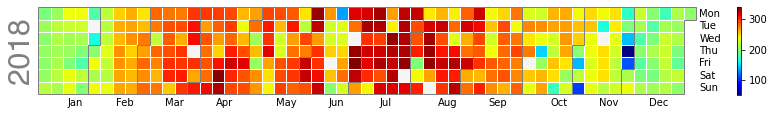

In [15]:

calplot.calplot(tmx.Ig,cmap='jet',how='mean')

### Exporting incomplete csv

In [16]:
tmx.to_csv('../../01_weather_data/03_imputing_process/01_test_data/Temixco_2018_incomplete.csv')